<a href="https://colab.research.google.com/github/iamsoumya421/Soumyojit-Saha/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mounting of the drive**

In [22]:
!pip install google

In [23]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Importing Libaries**

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math

#**Data Pre-processing**

In [29]:
car_data = pd.read_csv("/content/drive/MyDrive/car_price_prediction_model/Data/CarPrice.csv")

In [30]:
car_data.head(9)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,NaN,1061.0,57.50,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,170Nm@ 1800-2400rpm,5.0


In [31]:
car_data.shape

(8128, 13)

In [32]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7905 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 825.6+ KB


In [33]:
car_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          223
engine           221
max_power        216
torque           222
seats            221
dtype: int64

In [34]:
car_data = car_data.drop(['name', 'torque'],axis = 1)

In [35]:
print(car_data.fuel.value_counts())
print(car_data.seller_type.value_counts())
print(car_data.transmission.value_counts())
print(car_data.owner.value_counts())

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64
Manual       7078
Automatic    1050
Name: transmission, dtype: int64
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64


In [36]:
car_data.replace({'fuel':{'Diesel':0, 'Petrol':1, 'CNG':2, 'LPG':3}}, inplace= True)
car_data.replace({'seller_type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}}, inplace= True)
car_data.replace({'transmission':{'Manual':0, 'Automatic':1}}, inplace= True)
car_data.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':5}}, inplace= True)

In [37]:

car_data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,0,0,0,0,23.40,1248.0,74.00,5.0
1,2014,370000,120000,0,0,0,1,21.14,1498.0,103.52,5.0
2,2006,158000,140000,1,0,0,2,17.70,1497.0,78.00,5.0
3,2010,225000,127000,0,0,0,0,23.00,1396.0,90.00,5.0
4,2007,130000,120000,1,0,0,0,16.10,1298.0,88.20,5.0


In [38]:
median_mileage=math.floor(car_data.mileage.median())
car_data.mileage=car_data.mileage.fillna(median_mileage)
median_max_power=math.floor(car_data.max_power.median())
car_data.max_power=car_data.max_power.fillna(median_max_power)
median_engine=math.floor(car_data.engine.median())
car_data.engine=car_data.engine.fillna(median_engine)
median_seats=math.floor(car_data.seats.median())
car_data.seats=car_data.seats.fillna(median_seats)

In [39]:
car_data.head(20)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,0,0,0,0,23.40,1248.0,74.00,5.0
1,2014,370000,120000,0,0,0,1,21.14,1498.0,103.52,5.0
2,2006,158000,140000,1,0,0,2,17.70,1497.0,78.00,5.0
3,2010,225000,127000,0,0,0,0,23.00,1396.0,90.00,5.0
4,2007,130000,120000,1,0,0,0,16.10,1298.0,88.20,5.0
5,2017,440000,45000,1,0,0,0,20.14,1197.0,81.86,5.0
6,2007,96000,175000,3,0,0,0,19.00,1061.0,57.50,5.0
7,2001,45000,5000,1,0,0,1,16.10,796.0,37.00,4.0
8,2011,350000,90000,0,0,0,0,23.59,1364.0,67.10,5.0
9,2013,200000,169000,0,0,0,0,20.00,1399.0,68.10,5.0


#**Saving of the Pre-Processed Data**

In [ ]:
np.save('/content/drive/MyDrive/car_price_prediction_model/car_final_data.npy', car_data)

#**Loading of the Pre-Processed Data**

In [25]:
dataset = np.load('/content/drive/MyDrive/car_price_prediction_model/car_final_data.npy')

In [27]:
print(dataset)

[[2.0140e+03 4.5000e+05 1.4550e+05 ... 1.2480e+03 7.4000e+01 5.0000e+00]
 [2.0140e+03 3.7000e+05 1.2000e+05 ... 1.4980e+03 1.0352e+02 5.0000e+00]
 [2.0060e+03 1.5800e+05 1.4000e+05 ... 1.4970e+03 7.8000e+01 5.0000e+00]
 ...
 [2.0090e+03 3.8200e+05 1.2000e+05 ... 1.2480e+03 7.3900e+01 5.0000e+00]
 [2.0130e+03 2.9000e+05 2.5000e+04 ... 1.3960e+03 7.0000e+01 5.0000e+00]
 [2.0130e+03 2.9000e+05 2.5000e+04 ... 1.3960e+03 7.0000e+01 5.0000e+00]]


#**Data Visualization**

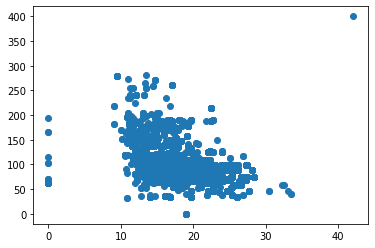

In [40]:
plt.scatter(car_data.mileage,car_data.max_power)
plt.show()

#**Splitting the data in training and test set**

In [41]:
X=car_data.drop(['selling_price'],axis=1)
Y=car_data['selling_price']

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)


#**Model Making**

In [48]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
prediction_X=model.predict(X_test)


In [50]:
print(prediction_X)

[ 115587.47444849 1142336.42232374 2249728.36843181 ... 1400029.68163053
 1789708.88630699  558482.01667571]


In [57]:
f1=metrics.f1_score(Y_test,prediction_X,average='weighted')

ValueError: ignored